# This Notebook is the first stage, preparing the data

The data is split into 3 groups:
- All data
- Data containing top 18 classification codes
- Data containing selected 7 codes

This is then further segmented into code types:
- SubGroup
- MainGrouo
- Subclass
- Class
- Section

Therefore resulting in a total of 3*5 = 15 data files 

In [1]:
# Import necessary packages
import nltk
import string
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Cleaning Raw Data

1. Convert IPC Classifications into an array
2. Combine Title, Abstract and Claims togther to obtain context 
3. Create new dataframe storing the Context and Classification Codes

In [35]:
# Load data file

df = pd.read_csv('Raw_Patent_2022.csv')
df.dropna(subset=['IPC Classifications', 'Claims'], inplace=True)
df['IPC Classifications'] = df['IPC Classifications'].astype(str)
df = df.replace("\n", " ", regex = True)
df['Claims'] = df['Claims'].replace(r'\s+', ' ', regex=True)
df['Abstract'] = df['Abstract'].replace(r'\s+', ' ', regex=True)
df.head(10)

web-scraper-order                              web-scraper-start-url  \
0       1685901346-1  https://www.lens.org/lens/search/patent/list?q...   
1       1685901349-2  https://www.lens.org/lens/search/patent/list?q...   
2       1685901351-3  https://www.lens.org/lens/search/patent/list?q...   
3       1685901353-4  https://www.lens.org/lens/search/patent/list?q...   
4       1685901357-5  https://www.lens.org/lens/search/patent/list?q...   
6       1685901361-7  https://www.lens.org/lens/search/patent/list?q...   
9      1685901368-10  https://www.lens.org/lens/search/patent/list?q...   
10     1685901372-11  https://www.lens.org/lens/search/patent/list?q...   
11     1685901374-12  https://www.lens.org/lens/search/patent/list?q...   
13     1685901379-14  https://www.lens.org/lens/search/patent/list?q...   

                                          Patent Link  \
0                                  Processor compiler   
1                                Image sensing device   
2   Antigen specific immunotherapy for COVID-19 fu...   
3              Security de-escalation for data access   
4   System and method for secure cloud-based physi...   
6   Collimator and detector based medical imaging ...   
9   Method and device for determining a relation b...   
10  Head-mounted display system without additional...   
11  Method and device for mapping between traffic ...   
13  Methods for beam management in millimeter wave...   

                                     Patent Link-href       Patent ID  \
0   https://www.lens.org/lens/patent/195-213-523-5...  US 11216734 B1   
1   https://www.lens.org/lens/patent/188-138-478-2...  US 11217616 B2   
2   https://www.lens.org/lens/patent/184-502-996-0...  US 11213581 B2   
3   https://www.lens.org/lens/patent/184-235-958-5...  US 11218491 B2   
4   https://www.lens.org/lens/patent/174-886-323-4...  US 11213237 B2   
6   https://www.lens.org/lens/patent/153-800-262-3...  US 11213262 B2   
9   https://www.lens.org/lens/patent/157-314-955-9...  US 11216614 B2   
10  https://www.lens.org/lens/patent/141-571-197-8...  US 11216095 B2   
11  https://www.lens.org/lens/patent/143-139-349-1...  US 11218901 B2   
13  https://www.lens.org/lens/patent/132-171-624-5...  US 11219027 B2   

                                                Title  \
0                                  Processor compiler   
1                                Image sensing device   
2   Antigen specific immunotherapy for COVID-19 fu...   
3              Security de-escalation for data access   
4   System and method for secure cloud-based physi...   
6   Collimator and detector based medical imaging ...   
9   Method and device for determining a relation b...   
10  Head-mounted display system without additional...   
11  Method and device for mapping between traffic ...   
13  Methods for beam management in millimeter wave...   

                                  IPC Classifications  \
0   G06N5/02                                      ...   
1                                          H01L27/146   
2   A61K39/215                                    ...   
3                                           G06F21/62   
4   A61B90/90                                     ...   
6   G01T1/20                                      ...   
9   G06F40/205                                    ...   
10  G06F1/16                                      ...   
11  H04W4/00                                      ...   
13  H04W4/00                                      ...   

                                  CPC Classifications  \
0   G06N5/022                                     ...   
1   H01L27/14621                                  ...   
2   C07K14/005                                    ...   
3   H04L63/105                                    ...   
4   G06F21/32                                     ...   
6   A61B6/4266                                    ...   
9   G06F40/205                                    ...   
10  G02B27/017                   

In [28]:
# Shape of dataframe (15694 rows and 14 columns)

df.shape

(15694, 14)

In [42]:
# Create new empty data frame
df2 = pd.DataFrame(columns=['Context','Classification Codes'])
df2.head()

Empty DataFrame
Columns: [Context, Classification Codes]
Index: []

In [43]:
# Combine the title, abstract and claims into one column and the IPC codes for the other column

for index, row in df.iterrows():
    x = row['IPC Classifications'].split(" ")
    output_list = [entity for entity in x if entity != '']    
    context = row['Title'] + ". " + row['Abstract'] + ". " + row['Claims']
    
    df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)


/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/576944710.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'Context': context, 'Classification Codes': output_list}, ignore_index=True)
/var/folders/2c/4qry5g914b91lnzzk9hs7yhw0000gn/T/ipykernel_58519/57

In [44]:
df2.head()

Context  \
0  Processor compiler. A system receives a predic...   
1  Image sensing device. An image sensing device ...   
2  Antigen specific immunotherapy for COVID-19 fu...   
3  Security de-escalation for data access. The co...   
4  System and method for secure cloud-based physi...   

                                Classification Codes  
0                              [G06N5/02, G06N20/00]  
1                                       [H01L27/146]  
2  [A61K39/215, A61K38/00, A61K39/00, A61P31/14, ...  
3                                        [G06F21/62]  
4  [A61B90/90, A61B5/00, A61B5/25, A61B5/259, A61...

In [46]:
# Download new datafile
df2.to_csv('Data_Original.csv', index=False)

# Pre-process Context

This stage applies techniques to prepreare the context data. Techniques included are:
1. Lower Casing
2. Remove Punctuation
3. Tokenization
4. Remove Stop Words
5. Stemming


In [49]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenise the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Apply stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    # Join the stemmed tokens back into a string
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

In [50]:
# Apply function to dataframe
df2['Context'] = df2['Context'].apply(preprocess_text)
df2.head()

Context  \
0  processor compil system receiv predict model r...   
1  imag sens devic imag sens devic includ substra...   
2  antigen specif immunotherapi covid19 fusion pr...   
3  secur deescal data access concept technolog di...   
4  system method secur cloudbas physiolog data pr...   

                                Classification Codes  
0                              [G06N5/02, G06N20/00]  
1                                       [H01L27/146]  
2  [A61K39/215, A61K38/00, A61K39/00, A61P31/14, ...  
3                                        [G06F21/62]  
4  [A61B90/90, A61B5/00, A61B5/25, A61B5/259, A61...

In [51]:
# Example of preprocessed text
for index, row in df2.iterrows():
    print(row['Context'])
    break

processor compil system receiv predict model receiv one runtim constraint system gener direct acycl graph dag predict model indic depend system compil predict model first instruct first processor base one runtim constraint dag system packag first instruct one runtim constraint dag predict model first binari system recompil predict model second instruct second processor base runtim constraint dag store first processor system packag second instruct dag runtim constraint second binari method compris measur compil instruct plural instruct power usag amount instruct instruct execut processor determin schedul execut plural instruct execut processor rate per unit time power usag processor execut plural instruct accord schedul execut within maximum valu schedul execut indic least order execut plural instruct compil plural instruct binari binari indic schedul execut plural instruct method claim 1 wherein compil determin schedul execut plural instruct total energi usag processor limit maximum va

In [52]:
# Download preprocessed dataframe
df2.to_csv('Data_Preprocessed.csv', index=False)

# Change Classification Codes to MainGroup

In [68]:
# Function to modify codes to maingroup (change all ending to /00)

def modify_codes_MainGroup(codes_list):
    modified_codes = []
    for code in codes_list:
        code_parts = code.split('/')
        modified_code = code_parts[0] + '/00'
        modified_codes.append(modified_code)

    # Remove any repeated codes
    modified_codes = list(set(modified_codes))

    return modified_codes

In [69]:
df3 = pd.DataFrame(df2['Context'])
df3['Classification Codes'] = df2['Classification Codes'].apply(modify_codes_MainGroup)
df3.head()

Context  \
0  processor compil system receiv predict model r...   
1  imag sens devic imag sens devic includ substra...   
2  antigen specif immunotherapi covid19 fusion pr...   
3  secur deescal data access concept technolog di...   
4  system method secur cloudbas physiolog data pr...   

                                Classification Codes  
0                              [G06N5/00, G06N20/00]  
1                                        [H01L27/00]  
2  [C07K14/00, A61P31/00, A61K38/00, A61K39/00, C...  
3                                        [G06F21/00]  
4  [G06F21/00, G16H40/00, A61B5/00, G16H10/00, A6...

In [70]:
df3.to_csv('Data_Preprocessed_MainGroup.csv', index=False)

# Change Classification Codes to Subclass 

In [62]:
# Function to modify codes to maingroup (remove all ending of /00)
def modify_codes_subclass(codes_list):
    modified_codes = []
    for code in codes_list:
        modified_code = code[:4]
        modified_codes.append(modified_code)

    # Remove any repeated codes
    modified_codes = list(set(modified_codes))

    return modified_codes


In [63]:
# Example
print(modify_codes_subclass(['C07K14/00', 'A61P31/00', 'A61K38/00']))

['A61P', 'C07K', 'A61K']


In [64]:
df4 = pd.DataFrame(df2['Context'])
df4['Classification Codes'] = df2['Classification Codes'].apply(modify_codes_subclass)
df4.head()

Context      Classification Codes
0  processor compil system receiv predict model r...                    [G06N]
1  imag sens devic imag sens devic includ substra...                    [H01L]
2  antigen specif immunotherapi covid19 fusion pr...  [A61P, C07K, A61K, C12N]
3  secur deescal data access concept technolog di...                    [G06F]
4  system method secur cloudbas physiolog data pr...  [A61B, G16Z, G16H, G06F]

In [65]:
df4.to_csv('Data_Preprocessed_Subclass.csv', index=False)

# Change Classification Codes to Class

In [71]:
# Function to modify codes to maingroup (Letter followed by two numbers) 

def modify_codes_class(codes_list):
    modified_codes = []
    for code in codes_list:
        modified_code = code[:3]
        modified_codes.append(modified_code)

    # Remove any repeated codes
    modified_codes = list(set(modified_codes))

    return modified_codes


In [72]:
# Example
print(modify_codes_class(['C07K14/00', 'A61P31/00', 'A61K38/00']))

['A61', 'C07']


In [74]:
df5 = pd.DataFrame(df2['Context'])
df5['Classification Codes'] = df2['Classification Codes'].apply(modify_codes_class)
df5.head()

Context Classification Codes
0  processor compil system receiv predict model r...                [G06]
1  imag sens devic imag sens devic includ substra...                [H01]
2  antigen specif immunotherapi covid19 fusion pr...      [A61, C07, C12]
3  secur deescal data access concept technolog di...                [G06]
4  system method secur cloudbas physiolog data pr...      [A61, G16, G06]

In [75]:
df5.to_csv('Data_Preprocessed_Class.csv', index=False)

# Change Classification Codes to Section

In [76]:
# Function to modify codes to Section (Just starting Letter) 

def modify_codes_section(codes_list):
    modified_codes = []
    for code in codes_list:
        # Change any number after the / to 00
        modified_code = code[:1]
        modified_codes.append(modified_code)

    # Remove any repeated codes
    modified_codes = list(set(modified_codes))

    return modified_codes


In [77]:
# Example
print(modify_codes_section(['C07K14/00', 'A61P31/00', 'A61K38/00']))

['C', 'A']


In [78]:
df6 = pd.DataFrame(df2['Context'])
df6['Classification Codes'] = df2['Classification Codes'].apply(modify_codes_section)
df6.head()

Context Classification Codes
0  processor compil system receiv predict model r...                  [G]
1  imag sens devic imag sens devic includ substra...                  [H]
2  antigen specif immunotherapi covid19 fusion pr...               [A, C]
3  secur deescal data access concept technolog di...                  [G]
4  system method secur cloudbas physiolog data pr...               [G, A]

In [79]:
df6.to_csv('Data_Preprocessed_Section.csv', index=False)

# Top 18 Classification Codes for SubGroup

In [277]:
df7 = df2.copy()
df7.head()

Context  \
0  processor compil system receiv predict model r...   
1  imag sens devic imag sens devic includ substra...   
2  antigen specif immunotherapi covid19 fusion pr...   
3  secur deescal data access concept technolog di...   
4  system method secur cloudbas physiolog data pr...   

                                Classification Codes  
0                              [G06N5/02, G06N20/00]  
1                                       [H01L27/146]  
2  [A61K39/215, A61K38/00, A61K39/00, A61P31/14, ...  
3                                        [G06F21/62]  
4  [A61B90/90, A61B5/00, A61B5/25, A61B5/259, A61...

In [278]:
# Shape before
df7.shape

(15694, 2)

In [279]:
# Count the frequency of each code in the "Classification Codes" column
code_freq = df7['Classification Codes'].apply(pd.Series).stack().value_counts()

# Get the top 18 codes based on their frequency
top_18_codes = code_freq.head(1921)

# Update the "Classification Codes" column to only contain the top 18 codes for each row
df7['Classification Codes'] = df7['Classification Codes'].apply(lambda codes: [code for code in codes if code in top_18_codes.index])

# Remove any rows where the "Classification Codes" column is empty after the filtering
df7 = df7[df7['Classification Codes'].apply(len) > 0]

In [239]:
# Shape after
df7.shape

(9898, 2)

In [240]:
# Print code and frequency
print(code_freq)

A61B5/00     2339
A61B17/00    1390
A61B90/00     992
G06T7/00      988
G06N20/00     876
             ... 
B60L53/31       1
B60L53/57       1
B60L53/65       1
G07C9/29        1
H04L5/18        1
Length: 7940, dtype: int64


In [241]:
# Total number of codes
print(sum(code_freq.values))

98291


In [276]:
num_codes_appeared_once = (code_freq >= 12).sum()

print("Total Number of Codes Appeared Only Once:", num_codes_appeared_once)

Total Number of Codes Appeared Only Once: 1291


In [243]:
num_rows_with_more_than_one_code = df7['Classification Codes'].apply(len).gt(1).sum()

print("Number of Rows with More Than One Code:", num_rows_with_more_than_one_code)

Number of Rows with More Than One Code: 3334


In [244]:
# Top 18 codes
print(top_18_codes)

A61B5/00     2339
A61B17/00    1390
A61B90/00     992
G06T7/00      988
G06N20/00     876
H04W72/04     771
A61K9/00      749
G06K9/62      711
G06K9/00      696
G16H10/60     634
A61B6/00      626
G06N3/08      616
H04L5/00      606
A61B18/00     578
A61K45/06     560
G16H50/20     554
A61B1/00      495
A61K39/00     458
dtype: int64


In [245]:
# Sum frequency of top 18 codes
print(sum(top_18_codes))

14639


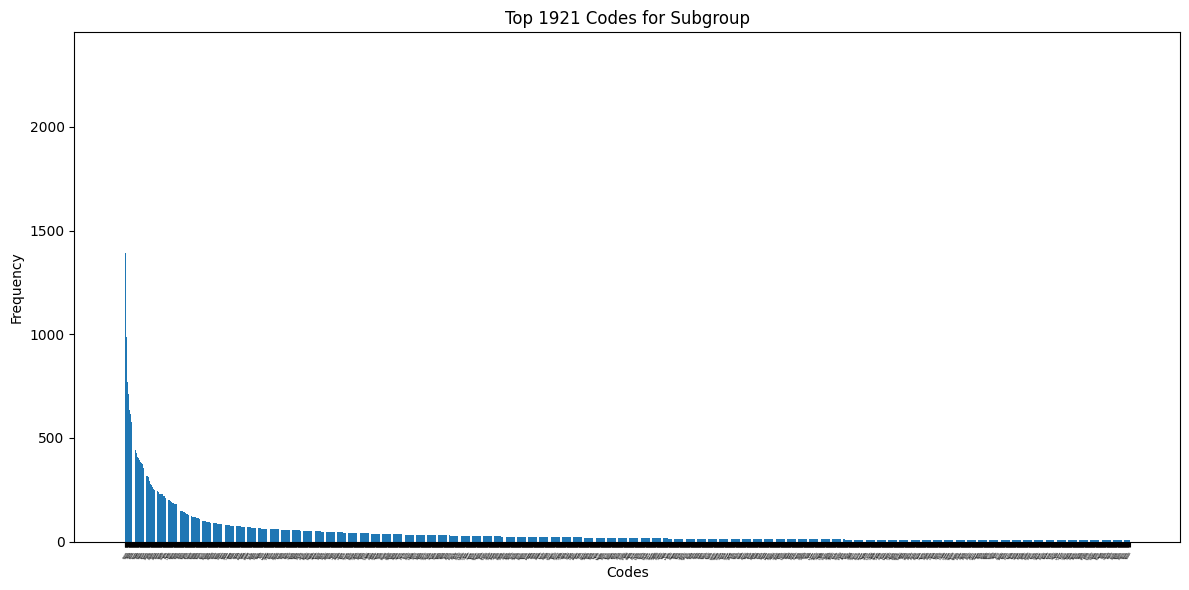

In [284]:
# Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_18_codes.index, top_18_codes.values)
plt.xticks(rotation=60, fontsize = 0)
plt.xlabel('Codes')
plt.ylabel('Frequency')
plt.title('Top 1921 Codes for Subgroup')
plt.tight_layout()
plt.show()

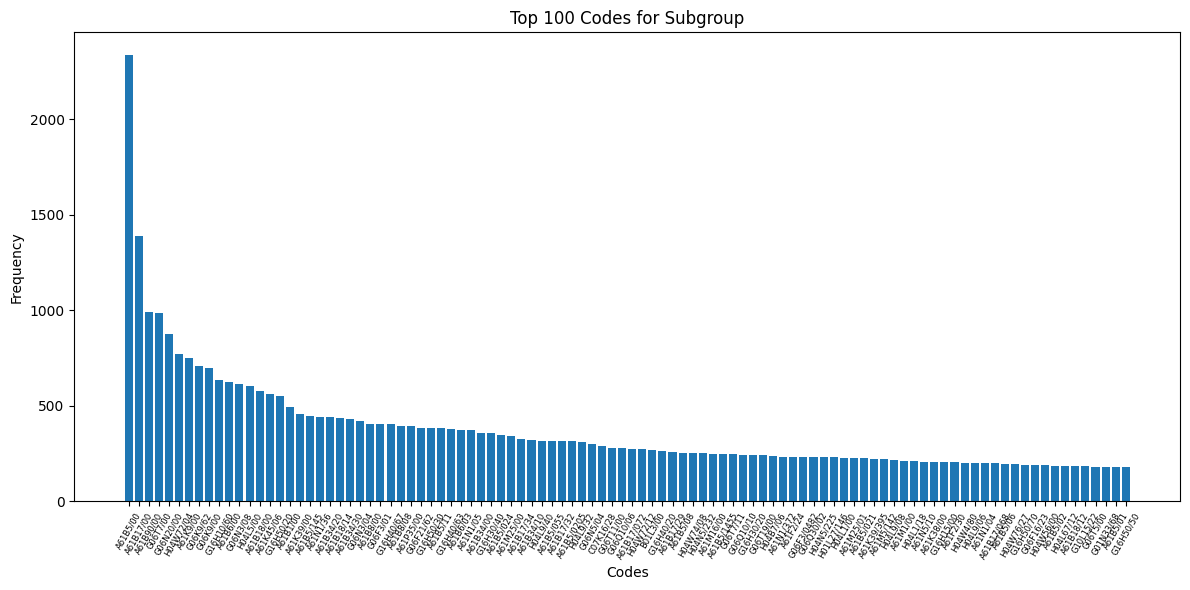

In [205]:
# Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_18_codes.index, top_18_codes.values)
plt.xticks(rotation=60, fontsize = 6)
plt.xlabel('Codes')
plt.ylabel('Frequency')
plt.title('Top 100 Codes for Subgroup')
plt.tight_layout()
plt.show()

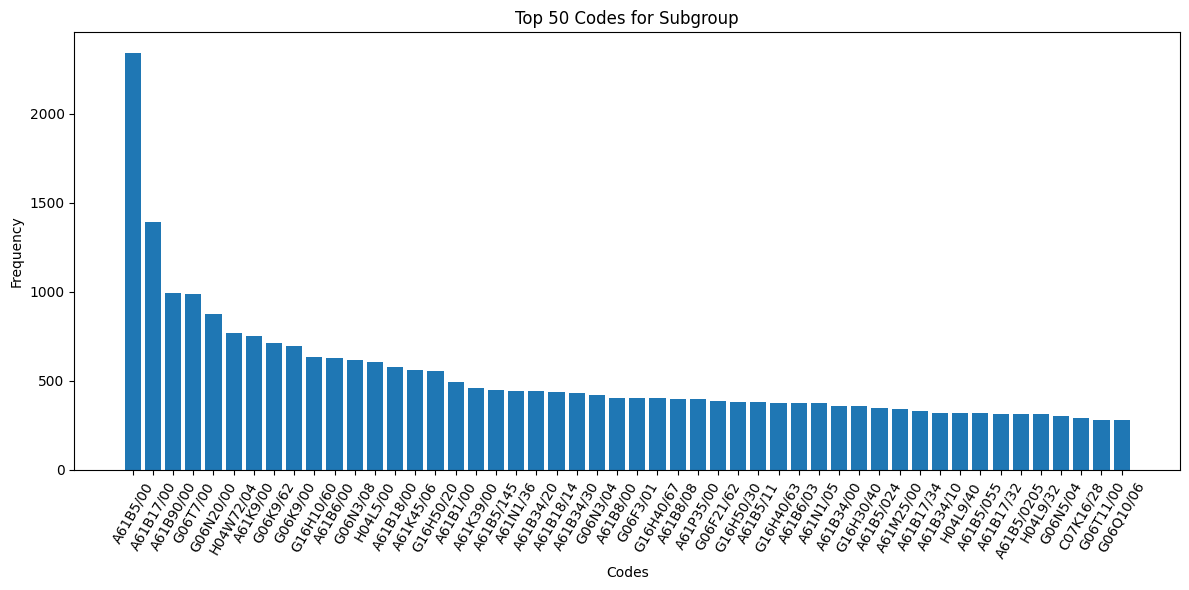

In [191]:
# Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_18_codes.index, top_18_codes.values)
plt.xticks(rotation=60)
plt.xlabel('Codes')
plt.ylabel('Frequency')
plt.title('Top 50 Codes for Subgroup')
plt.tight_layout()
plt.show()

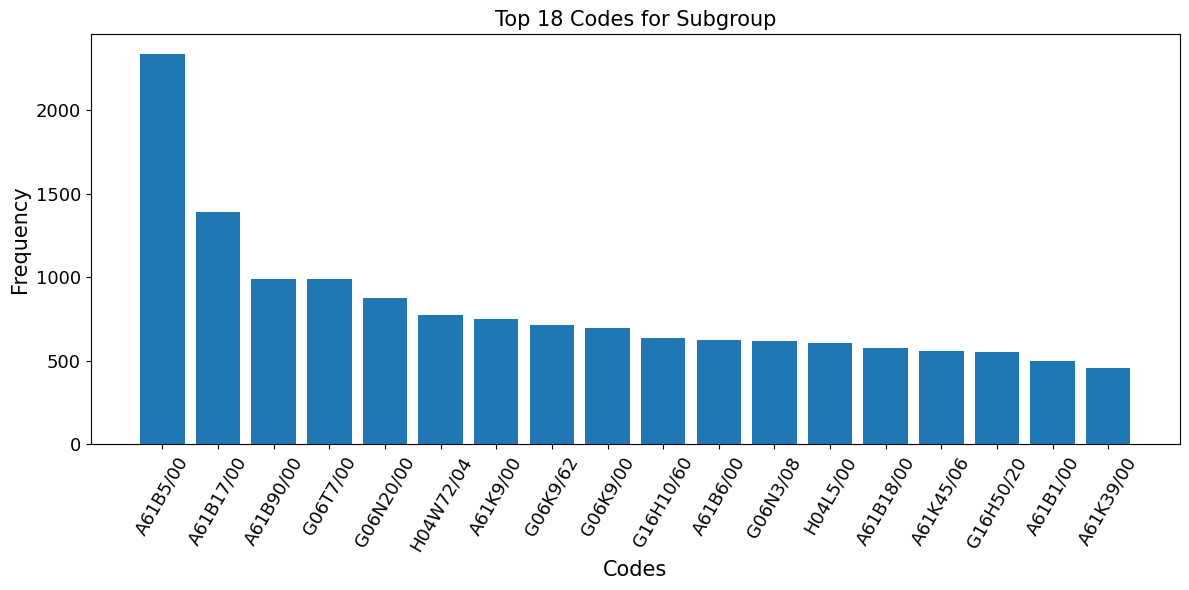

In [215]:
# Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_18_codes.index, top_18_codes.values)
plt.xticks(rotation=60, fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Codes', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Top 18 Codes for Subgroup', fontsize = 15)
plt.tight_layout()
plt.show()

In [247]:
df7.to_csv('Data_Preprocessed_SubGroup_Top18.csv', index=False)

# Top 18 Classification Codes for MainGroup


In [248]:
df8 = df3.copy()
df8.shape

(15694, 2)

In [249]:
# Count the frequency of each code in the "Classification Codes" column
code_freq = df8['Classification Codes'].apply(pd.Series).stack().value_counts()

# Get the top 18 codes 
top_18_codes = ['A61B5/00','A61B17/00','A61B90/00','G06T7/00','G06N20/00','H04W72/00','A61K9/00','G06K9/00','G06K9/00','G16H10/00','A61B6/00','G06N3/00','H04L5/00','A61B18/00','A61K45/00','G16H50/00','A61B1/00','A61K39/00']

# Update the "Classification Codes" column to only contain the top 18 codes for each row
df8['Classification Codes'] = df8['Classification Codes'].apply(lambda codes: [code for code in codes if code in top_18_codes])

# Remove any rows where the "Classification Codes" column is empty after the filtering
df8 = df8[df8['Classification Codes'].apply(len) > 0]

In [250]:
df8.shape

(10981, 2)

In [251]:
df8.to_csv('Data_Preprocessed_MainGroup_Top18.csv', index=False)

# Top 18 Classification Codes for Subclass


In [252]:
df9 = df4.copy()
df9.shape

(15694, 2)

In [254]:
# Count the frequency of each code in the "Classification Codes" column
code_freq = df9['Classification Codes'].apply(pd.Series).stack().value_counts()

# Get the top 18 codes 
top_18_codes = ['A61B','A61B','A61B','G06T','G06N','H04W','A61K','G06K','G06K','G16H','A61B','G06N','H04L','A61B','A61K','G16H','A61B','A61K']

# Update the "Classification Codes" column to only contain the top 18 codes for each row
df9['Classification Codes'] = df9['Classification Codes'].apply(lambda codes: [code for code in codes if code in top_18_codes])

# Remove any rows where the "Classification Codes" column is empty after the filtering
df9 = df9[df9['Classification Codes'].apply(len) > 0]

df9.shape

(13120, 2)

In [263]:
df9.to_csv('Data_Preprocessed_Subclass_Top18.csv', index=False)

# Top 18 Classification Codes for Class


In [256]:
df10 = df5.copy()
df10.shape

(15694, 2)

In [258]:
# Count the frequency of each code in the "Classification Codes" column
code_freq = df10['Classification Codes'].apply(pd.Series).stack().value_counts()

# Get the top 18
top_18_codes = ['A61','A61','A61','G06','G06','H04','A61','G06','G06','G16','A61','G06','H04','A61','A61','G16','A61','A61']

# Update the "Classification Codes" column to only contain the top 18 codes for each row
df10['Classification Codes'] = df10['Classification Codes'].apply(lambda codes: [code for code in codes if code in top_18_codes])

# Remove any rows where the "Classification Codes" column is empty after the filtering
df10 = df10[df10['Classification Codes'].apply(len) > 0]

df10.shape

(15237, 2)

In [261]:
df10.to_csv('Data_Preprocessed_Class_Top18.csv', index=False)

# Top 18 Classification Codes for Section


In [264]:
df11 = df6.copy()
df11.shape

(15694, 2)

In [266]:
# Count the frequency of each code in the "Classification Codes" column
code_freq = df11['Classification Codes'].apply(pd.Series).stack().value_counts()

# Get the top 18 codes
top_18_codes = ['A','A','A','G','G','H','A','G','G','G','A','G','H','A','A','G','A','A']

# Update the "Classification Codes" column to only contain the top 18 codes for each row
df11['Classification Codes'] = df11['Classification Codes'].apply(lambda codes: [code for code in codes if code in top_18_codes])

# Remove any rows where the "Classification Codes" column is empty after the filtering
df11 = df11[df11['Classification Codes'].apply(len) > 0]

df11.shape

(15612, 2)

In [268]:
df11.to_csv('Data_Preprocessed_Section_Top18.csv', index=False)

# Selected 7 Classification Codes for SubGroup

In [288]:
df12 = df2.copy()
df12.shape

(15694, 2)

In [289]:
# Count the frequency of each code in the "Classification Codes" column
code_freq = df12['Classification Codes'].apply(pd.Series).stack().value_counts()

# Use selected 7 codes 
selected_7_codes = ['A61B5/00','A61B17/00','G06N20/00','G06K9/00','G16H10/60','A61B6/00','A61B1/00']

# Update the "Classification Codes" column to only contain the selected 7 codes for each row
df12['Classification Codes'] = df12['Classification Codes'].apply(lambda codes: [code for code in codes if code in selected_7_codes])

# Remove any rows where the "Classification Codes" column is empty after the filtering
df12 = df12[df12['Classification Codes'].apply(len) > 0]

df12.shape


(6067, 2)

In [290]:
df12.to_csv('Data_Preprocessed_SubGroup_Selected8.csv', index=False)

# Selected 7 Classification Codes for MainGroup

In [291]:
df13 = df3.copy()
df13.shape

(15694, 2)

In [292]:
# Count the frequency of each code in the "Classification Codes" column
code_freq = df13['Classification Codes'].apply(pd.Series).stack().value_counts()

# Use selected 7 codes 
selected_7_codes = ['A61B5/00','A61B17/00','G06N20/00','G06K9/00','G16H10/00','A61B6/00','A61B1/00']

# Update the "Classification Codes" column to only contain the selected 7 codes for each row
df13['Classification Codes'] = df13['Classification Codes'].apply(lambda codes: [code for code in codes if code in selected_7_codes])

# Remove any rows where the "Classification Codes" column is empty after the filtering
df13 = df13[df13['Classification Codes'].apply(len) > 0]

df13.shape


(7283, 2)

In [293]:
df13.to_csv('Data_Preprocessed_MainGroup_Selected8.csv', index=False)

# Selected 7 Classification Codes for Subclass

In [294]:
df14 = df4.copy()
df14.shape

(15694, 2)

In [296]:
# Count the frequency of each code in the "Classification Codes" column
code_freq = df14['Classification Codes'].apply(pd.Series).stack().value_counts()

# Use selected 7 codes 
selected_7_codes = ['A61B','A61B','G06N','G06K','G16H','A61B','A61B']

# Update the "Classification Codes" column to only contain the selected 7 codes for each row
df14['Classification Codes'] = df14['Classification Codes'].apply(lambda codes: [code for code in codes if code in selected_7_codes])

# Remove any rows where the "Classification Codes" column is empty after the filtering
df14 = df14[df14['Classification Codes'].apply(len) > 0]

df14.shape


(8771, 2)

In [297]:
df14.to_csv('Data_Preprocessed_Subclass_Selected8.csv', index=False)

# Selected 7 Classification Codes for Class

In [298]:
df15 = df5.copy()
df15.shape

(15694, 2)

In [300]:
# Count the frequency of each code in the "Classification Codes" column
code_freq = df15['Classification Codes'].apply(pd.Series).stack().value_counts()

# Use selected 7 codes 
selected_7_codes = ['A61','A61','G06','G06','G16','A61','A61']

# Update the "Classification Codes" column to only contain the selected 7 codes for each row
df15['Classification Codes'] = df15['Classification Codes'].apply(lambda codes: [code for code in codes if code in selected_7_codes])

# Remove any rows where the "Classification Codes" column is empty after the filtering
df15 = df15[df15['Classification Codes'].apply(len) > 0]

df15.shape


(13357, 2)

In [302]:
df15.to_csv('Data_Preprocessed_Class_Selected7.csv', index=False)

# Selected 7 Classification Codes for Section

In [303]:
df16 = df6.copy()
df16.shape

(15694, 2)

In [305]:
# Count the frequency of each code in the "Classification Codes" column
code_freq = df16['Classification Codes'].apply(pd.Series).stack().value_counts()

# Use selected 7 codes 
selected_7_codes = ['A','A','G','G','G','A','A']

# Update the "Classification Codes" column to only contain the selected 7 codes for each row
df16['Classification Codes'] = df16['Classification Codes'].apply(lambda codes: [code for code in codes if code in selected_7_codes])

# Remove any rows where the "Classification Codes" column is empty after the filtering
df16 = df16[df16['Classification Codes'].apply(len) > 0]

df16.shape


(13799, 2)

In [307]:
df16.to_csv('Data_Preprocessed_Section_Selected7.csv', index=False)